# Pre-processing student answers

In [3]:
import os 
import sys 

sys.path.append("/Users/bobaebak/git/ai_text_detection")

In [7]:
from utils.file_helper import *
from utils.text_helper import *
from utils.plot_helper import *

# Load Student Answer

In [8]:
def load_raw_answers(file_name):
    with open(file_name, "r") as f:
        text = f.read()
    
    return text 

In [9]:
raw_text = load_raw_answers('../data/student_answers.txt')

# Extract Student Answer

In [10]:
def extract_only_answers(key, raw_text):
    answer_list = []

    given_answer_pattern = r"Given Answer:\s*([\s\S]*?)(Correct|Incorrect|Partial Credit)*(?=\s*Response Feedback:|\Z)"

    # Extract the text following "Given Answer:" and its correctness using regex
    given_answers = re.findall(given_answer_pattern, raw_text)

    # Check if the word exists in each "Given Answer" section and print its correctness
    if given_answers:
        idx = 0
        for given_answer in given_answers:
            st_answer = given_answer[0].strip()
            if st_answer != '':
                answer_list.append({f"{key}": st_answer})
                # print(given_answer[0].strip())
                # print("=======================")
                idx += 1
    else:
        print("Given Answer not found in the text.")
    
    return answer_list

In [18]:
# extract only student answer
answer_list = extract_only_answers("raw", raw_text)
answer_list[:5]

[{'raw': 'Integrity and availability was compromised due to the malware. It threatens availability due to wiping the master boot record of vulnerable machines, which prevented users from being able to access and use the infected machines, corresponds to loss of functionality. This malware also threatened the integrity of the machines by being able to overwrite files with 1MB worth of 0xCC bytes, thus rendering the files unreliable.\n\nOrganizations could have reduced damage done to the machines by blocking network connections to unnecessary websites, (e.g. social medias like discord).\n\nOrganizations could have also used up-to-date anti-malware software that utilize Artificial Intelligence to detect the malware and preventing it from causing harm to the organization.'},
 {'raw': 'Availability is compromised because the master boot record has been wiped and Files have been overwritten by a wiper.\n\nActions that should have been taken to prevent the attacks includes:\n\nUpdating the OS

# Preprocess Student Answer

In [19]:
for item in answer_list:
    text = item['raw'].strip()
    # remove newline 
    text = re.sub(r'\n', '', text)
    # to lowcase
    text = lowercase_text(text)
    # remove urls
    text = remove_urls(text)
    
    item['raw_len'] = len(tokenize_text(item['raw'].strip()))
    item['input'] = text 
    item['input_len'] = len(tokenize_text(text))

In [20]:
answer_list[:5]

[{'raw': 'Integrity and availability was compromised due to the malware. It threatens availability due to wiping the master boot record of vulnerable machines, which prevented users from being able to access and use the infected machines, corresponds to loss of functionality. This malware also threatened the integrity of the machines by being able to overwrite files with 1MB worth of 0xCC bytes, thus rendering the files unreliable.\n\nOrganizations could have reduced damage done to the machines by blocking network connections to unnecessary websites, (e.g. social medias like discord).\n\nOrganizations could have also used up-to-date anti-malware software that utilize Artificial Intelligence to detect the malware and preventing it from causing harm to the organization.',
  'raw_len': 124,
  'input': 'integrity and availability was compromised due to the malware. it threatens availability due to wiping the master boot record of vulnerable machines, which prevented users from being able t

# Save Student Answer

In [21]:
file_name = "../data/student_answers.json"
save_json_list(file_name, answer_list)

JSON array saved to ../data/student_answers.json


In [22]:
answer_list = load_json_list(file_name)

In [23]:
answer_list[:1]

[{'raw': 'Integrity and availability was compromised due to the malware. It threatens availability due to wiping the master boot record of vulnerable machines, which prevented users from being able to access and use the infected machines, corresponds to loss of functionality. This malware also threatened the integrity of the machines by being able to overwrite files with 1MB worth of 0xCC bytes, thus rendering the files unreliable.\n\nOrganizations could have reduced damage done to the machines by blocking network connections to unnecessary websites, (e.g. social medias like discord).\n\nOrganizations could have also used up-to-date anti-malware software that utilize Artificial Intelligence to detect the malware and preventing it from causing harm to the organization.',
  'raw_len': 124,
  'input': 'integrity and availability was compromised due to the malware. it threatens availability due to wiping the master boot record of vulnerable machines, which prevented users from being able t

# Student Answer Data Distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


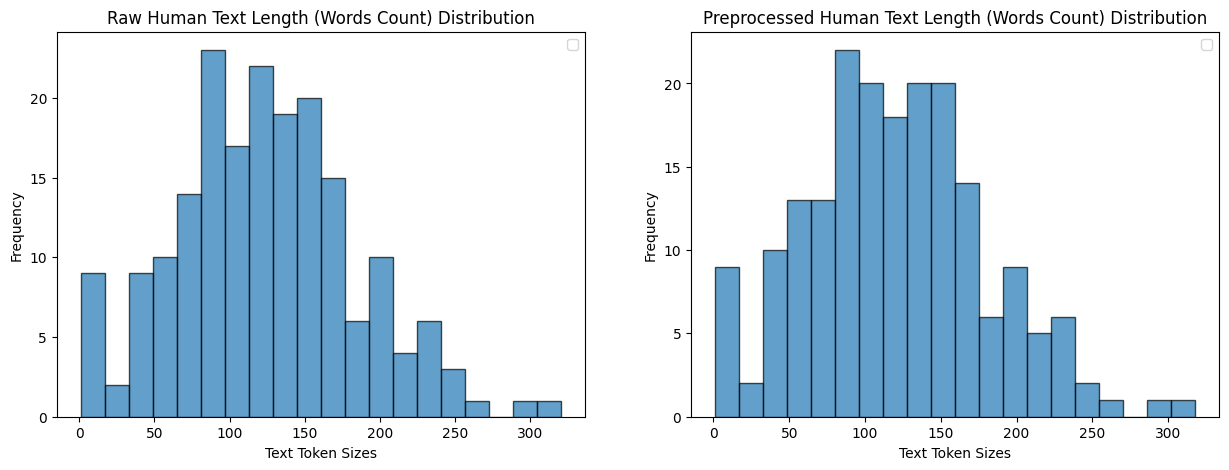

In [44]:
plot_helper = PlotHelper(
    row=1, col=2, figsize=(15,5), title="",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Token Sizes", ylabel="Frequency", title="Raw Human Text Length (Words Count) Distribution", 
                 x=[[item['raw_len'] for item in answer_list]], 
                 args=[{"bins":20, "edgecolor":"black", "alpha":0.7}]
        ),
        PlotItem(ptype="hist", xlabel="Text Token Sizes", ylabel="Frequency", title="Preprocessed Human Text Length (Words Count) Distribution", 
                 x=[[item['input_len'] for item in answer_list]], 
                 args=[{"bins":20, "edgecolor":"black", "alpha":0.7}]
        ),
    ]
)

_ = draws(plot_helper)

# Full

In [46]:
# load raw text
raw_text = load_raw_answers('../data/student_answers.txt')

# extract only student answer
answer_list = extract_only_answers("raw", raw_text)

for item in answer_list:
    text = item['raw'].strip()
    # remove newline 
    text = re.sub(r'\n', '', text)
    # to lowcase
    text = lowercase_text(text)
    # remove urls
    text = remove_urls(text)
    
    item['raw_len'] = len(tokenize_text(item['raw'].strip()))
    item['input'] = text 
    item['input_len'] = len(tokenize_text(text))

file_name = "../data/student_answers.json"
save_json_list(file_name, answer_list)

JSON array saved to ../data/student_answers.json
